In [269]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from itertools import cycle
import seaborn as sns
%matplotlib inline

# Read data in without lables
X1 = genfromtxt('cluster1.csv', delimiter=',' , usecols=range(0,2))
X2 = genfromtxt('cluster2.csv', delimiter=',' , usecols=range(0,2))
X3 = genfromtxt('cluster3.csv', delimiter=',' , usecols=range(0,2))


In [270]:
# Funciton for performing Affinity Propagation Clustering and plotting the results
def AP(X, damping, preference):
    af = AffinityPropagation(damping=damping, preference=preference, affinity='euclidean').fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    
    n_clusters_ = len(cluster_centers_indices)

    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('AP - Number of clusters: %d' % n_clusters_)
    plt.show()

In [271]:
# Funciton for performing k-means Clustering and plotting the results
# This kmeans method uses the Expectation Maximization algorithm
# It computes the Maximum Likelihood cluster center for each point, and it minimizes Euclidean distance

def kmeansPlot(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, 
                    precompute_distances='auto').fit(X)
    
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    plt.close('all')
    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    
    # plot cluster
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        
    # Plot cluster centers
    for k in cluster_centers:
        # The center of the cluster is marked with a star sign in black
        plt.plot(k[0], k[1], color='black', marker='*')  
                   
    plt.title('Kmeans - Number of clusters: %d' % n_clusters)
    plt.show()

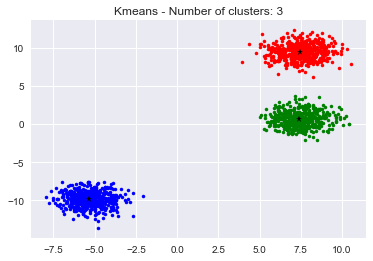

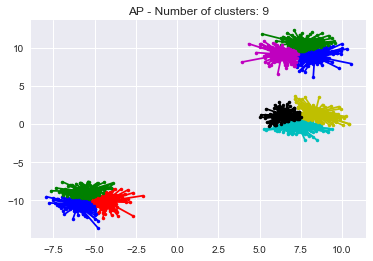

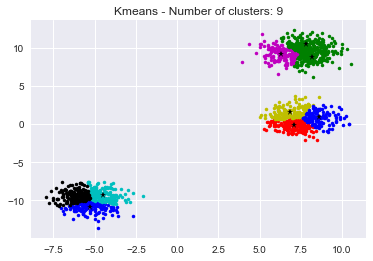

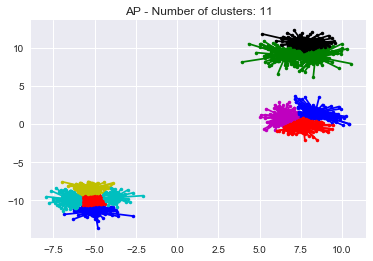

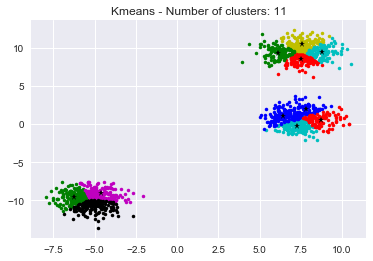

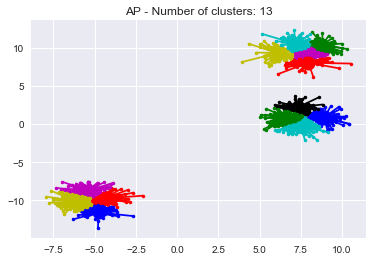

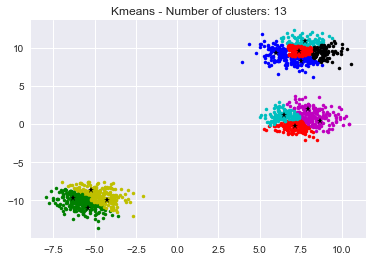

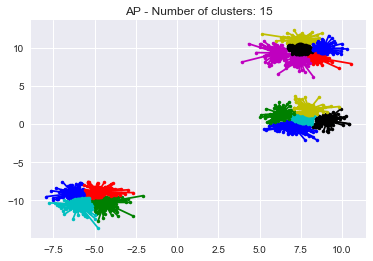

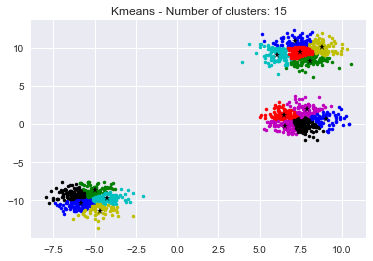

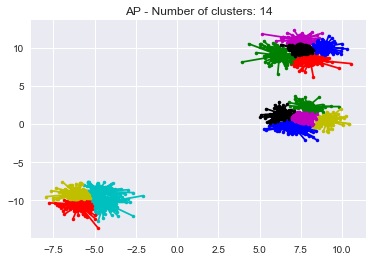

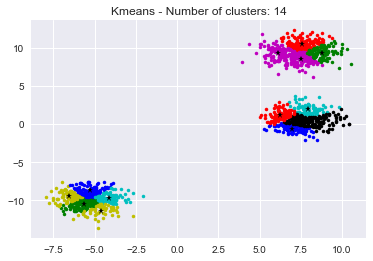

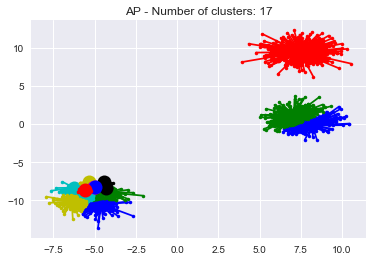

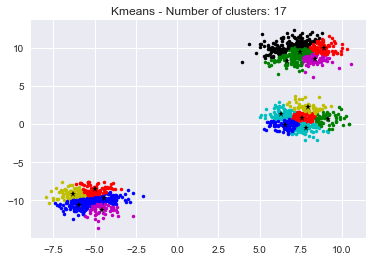

In [272]:
# Clustering for Cluster1 dataset

kmeansPlot(X1, 3)
AP(X1, 0.9, None) #9
kmeansPlot(X1, 9)
AP(X1, 0.6, -90) #11
kmeansPlot(X1, 11)
AP(X1, 0.7, -100) #13
kmeansPlot(X1, 13)
AP(X1, 0.9, -50) #15
kmeansPlot(X1, 15)
AP(X1, 0.9, -60)#14
kmeansPlot(X1, 14)
AP(X1, 0.5, None) #17 
kmeansPlot(X1, 17)


### Observations from clustering 'cluster1.csv' dataset:
Determining the number of clusters in Kmeans is much easier than with the Affinity Propagation method. In Affinity Propagation, one needs to play around with the parameters for quit some time and even then you might not get the number of clusters desired. Especially with a dataset like this, intuitively one can see these dense clumps and expect them to cluster together. I tried to create 3 clusters with AP and tweaked the parameters but no matter how much I tried, I couldn't create 3 clusters with AP method! So I conclude that Kmeans clustering is the best for this dataset type, where the data points are densely packed at some areas.  


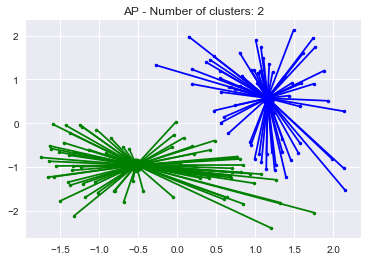

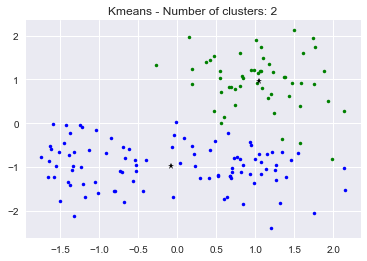

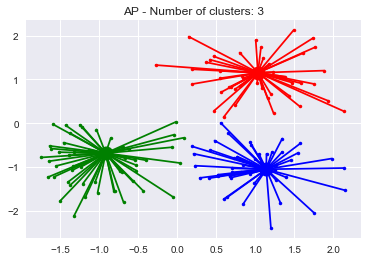

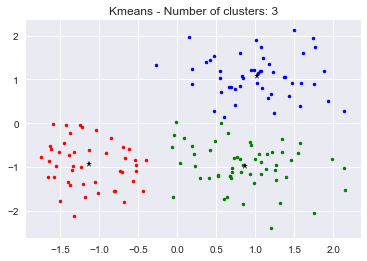

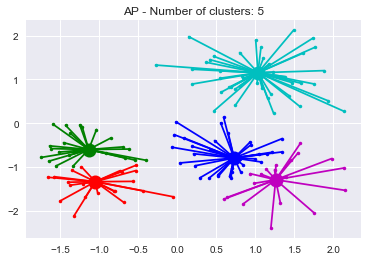

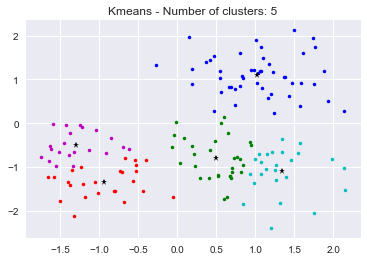

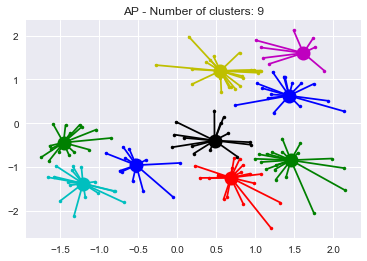

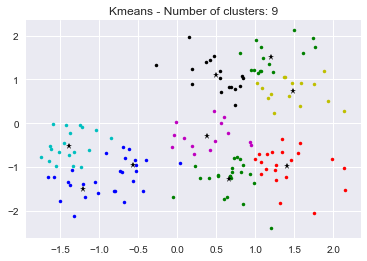

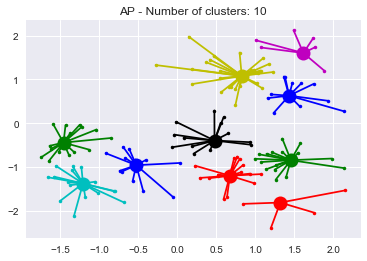

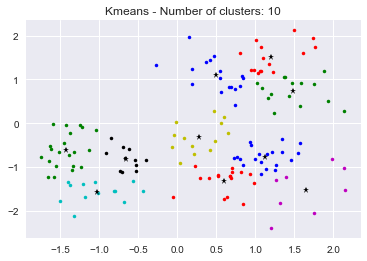

In [273]:
# Clustering for Cluster2 dataset

AP(X2, 0.7, -100) # 2
kmeansPlot(X2, 2)
AP(X2, 0.5, -50) # 3
kmeansPlot(X2, 3)
AP(X2, 0.7, -10) #5
kmeansPlot(X2, 5)
AP(X2, 0.5, -5) #9
kmeansPlot(X2, 9)
AP(X2, 0.5, None) # 10
kmeansPlot(X2, 10)

### Observations from clustering 'cluster2.csv' dataset:
kmeans is too simple to make higher than 3 clusters! And it's definetely not the way to go for a sparse dataset like this. So for a sparse dataset, the Affinity Propagation has a clear advantage over Kmeans. 

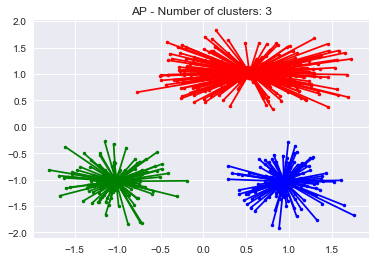

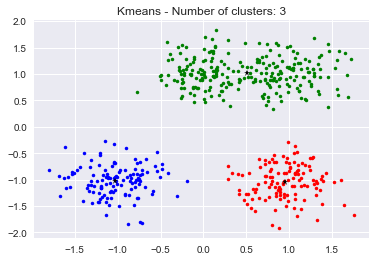

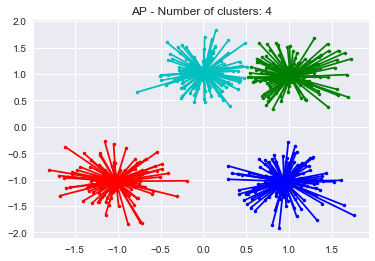

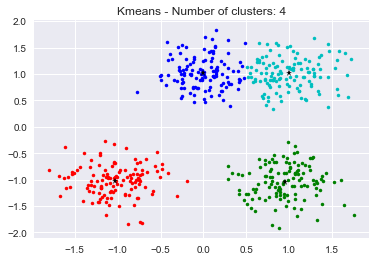

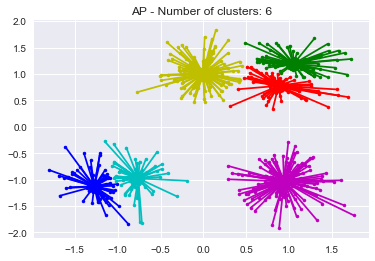

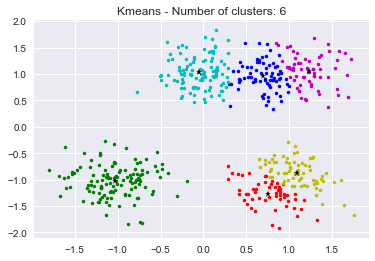

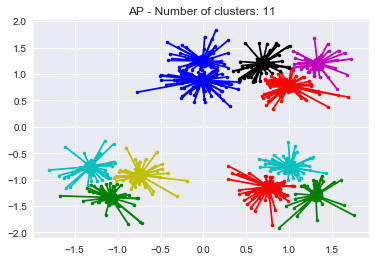

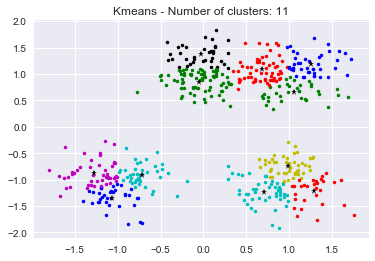

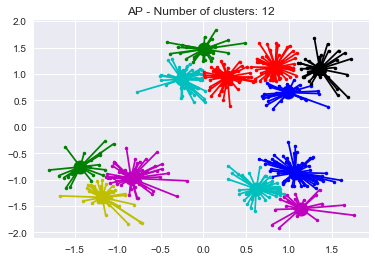

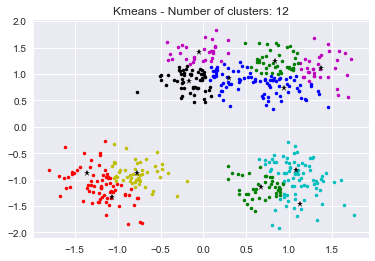

In [274]:
# Clustering for Cluster3 dataset

AP(X3, 0.7, -100) #3
kmeansPlot(X3, 3)
AP(X3, 0.7, -20) #4
kmeansPlot(X3, 4)
AP(X3, 0.7, -10) #6
kmeansPlot(X3, 6)
AP(X3, 0.7, -5) #11
kmeansPlot(X3, 11)
AP(X3, 0.5, None) #12
kmeansPlot(X3, 12)

### Observations from clustering 'cluster3.csv' dataset:
This dataset is somewhat dense and sparse. One needs domain knowledge to know which one to go for for data representation, Affinity Propagation or kmeans. 
And since I don't know anything about these datasets, I can't make a judgment call on which one is the best in this case. 